In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from yahooquery import Ticker

In [2]:
analyst_data = pd.read_csv('data/analyst_consensus_data.csv')

In [3]:
analyst_data.head()

,Ticker,AveragePriceTarget,NumRatings,ClosingPrice,RealMarketCap
0,A,166.500,14,138.089996,4.088458e+10
1,AA,50.000,11,39.430000,7.032538e+09
2,AADI,37.000,3,7.200000,1.756447e+08
3,AAL,16.625,14,13.890000,1.862496e+10
4,AAN,16.000,5,9.540000,2.936460e+08


Setting Index as Ticker

In [4]:
analyst_data.set_index('Ticker', inplace = True)

In [5]:
# Making AveragePriceTarget, ClosingPrice rounded to 2 places
analyst_data['AveragePriceTarget'] = analyst_data['AveragePriceTarget'].round(2)
analyst_data['ClosingPrice'] = analyst_data['ClosingPrice'].round(2)

In [6]:
analyst_data['ExpectedGrowthRate'] = ((analyst_data['AveragePriceTarget']-analyst_data['ClosingPrice'])/analyst_data['ClosingPrice']).round(3)

In [7]:
analyst_data.head()

,AveragePriceTarget,NumRatings,ClosingPrice,RealMarketCap,ExpectedGrowthRate
Ticker,,,,,
A,166.50,14,138.09,4.088458e+10,0.206
AA,50.00,11,39.43,7.032538e+09,0.268
AADI,37.00,3,7.20,1.756447e+08,4.139
AAL,16.62,14,13.89,1.862496e+10,0.197
AAN,16.00,5,9.54,2.936460e+08,0.677


In [8]:
analyst_data[analyst_data['ExpectedGrowthRate'] == 149]

,AveragePriceTarget,NumRatings,ClosingPrice,RealMarketCap,ExpectedGrowthRate
Ticker,,,,,
CDAK,9.0,3,0.06,2.828773e+06,149.0


In [9]:
# Removing Rows that have less than 3 ratings
analyst_data = analyst_data[analyst_data['NumRatings'] >= 3]

In [10]:
analyst_data.dropna(inplace = True)

In [11]:
analyst_data.describe()

,AveragePriceTarget,NumRatings,ClosingPrice,RealMarketCap,ExpectedGrowthRate
count,3261.000000,3261.000000,3261.000000,3.261000e+03,3261.000000
mean,65.573125,8.585097,54.231644,1.587789e+10,1.045429
std,159.038131,5.050653,148.094885,8.092269e+10,4.204444
min,0.500000,3.000000,0.060000,1.928435e+06,-0.658000
25%,12.000000,4.000000,6.670000,4.834724e+08,0.141000
50%,28.000000,7.000000,20.150000,2.083061e+09,0.305000
75%,70.000000,12.000000,57.760000,7.572275e+09,0.720000
max,5712.500000,20.000000,5542.840000,2.593336e+12,149.000000


In [12]:
analyst_data['OverallRecommendation'] = analyst_data['ExpectedGrowthRate'].apply(lambda x: 1 if x > 0.25 else (-1 if x < 0 else 0))

In [13]:
analyst_data['OverallRecommendation'].value_counts()

 1    1862
 0    1234
-1     165
Name: OverallRecommendation, dtype: int64

In [14]:
analyst_data.head()

,AveragePriceTarget,NumRatings,ClosingPrice,RealMarketCap,ExpectedGrowthRate,OverallRecommendation
Ticker,,,,,,
A,166.50,14,138.09,4.088458e+10,0.206,0
AA,50.00,11,39.43,7.032538e+09,0.268,1
AADI,37.00,3,7.20,1.756447e+08,4.139,1
AAL,16.62,14,13.89,1.862496e+10,0.197,0
AAN,16.00,5,9.54,2.936460e+08,0.677,1


In [15]:
# Getting Projected Market Cap- Based on analyst consensus growth rate
analyst_data['ProjectedMarketCap'] = ((analyst_data['RealMarketCap'] * analyst_data['ExpectedGrowthRate']) + analyst_data['RealMarketCap'])

In [16]:
analyst_data.head()

,AveragePriceTarget,NumRatings,ClosingPrice,RealMarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap
Ticker,,,,,,,
A,166.50,14,138.09,4.088458e+10,0.206,0,4.930681e+10
AA,50.00,11,39.43,7.032538e+09,0.268,1,8.917258e+09
AADI,37.00,3,7.20,1.756447e+08,4.139,1,9.026382e+08
AAL,16.62,14,13.89,1.862496e+10,0.197,0,2.229408e+10
AAN,16.00,5,9.54,2.936460e+08,0.677,1,4.924443e+08


In [17]:
# Write to CSV File to Transfer to Modeling Notebook
analyst_data.to_csv('analyst_data_with_labels.csv')

### Total Revenue EDA

In [36]:
data_with_revenue = pd.read_csv('data/RevandEbitda.csv')

In [47]:
data_with_revenue.describe()

,Unnamed: 0,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA
count,3229.000000,3229.000000,3229.000000,3229.000000,3.229000e+03,3229.000000,3229.000000,3.229000e+03,3.229000e+03,3.229000e+03
mean,1614.699597,65.922608,8.596160,54.519319,1.599646e+10,1.050359,0.520285,1.865947e+10,3.470231e+10,5.164334e+09
std,932.640443,159.736665,5.060581,148.745856,8.131232e+10,4.223081,0.591640,9.106595e+10,7.293157e+11,1.092131e+11
min,0.000000,0.500000,3.000000,0.060000,1.928435e+06,-0.658000,-1.000000,1.355883e+07,-1.116000e+09,-1.418712e+10
25%,807.000000,12.000000,4.000000,6.670000,4.821439e+08,0.141000,0.000000,8.892436e+08,1.673643e+08,-2.807100e+07
50%,1615.000000,28.000000,7.000000,20.250000,2.083061e+09,0.305000,1.000000,2.839393e+09,1.006090e+09,8.833700e+07
75%,2422.000000,71.000000,12.000000,58.140000,7.623261e+09,0.724000,1.000000,9.401671e+09,4.824698e+09,7.450220e+08
max,3229.000000,5712.500000,20.000000,5542.840000,2.593336e+12,149.000000,1.000000,2.738563e+12,3.137951e+13,5.403379e+12


In [51]:
data_with_revenue['TotalRevenue'].max()

31379507000000.0

In [52]:
data_with_revenue[data_with_revenue['TotalRevenue'] == 31379507000000.0]

,Unnamed: 0,Ticker,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA
2861,2861,TM,171.57,3,140.42,1.915933e+11,0.222,0,2.341270e+11,3.137951e+13,5.403379e+12


In [54]:
data_with_revenue.drop([970, 2861], inplace=True)

In [59]:
data_with_revenue.describe()

,Unnamed: 0,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA
count,3228.000000,3228.000000,3228.000000,3228.000000,3.228000e+03,3228.000000,3228.000000,3.228000e+03,3.228000e+03,3.228000e+03
mean,1614.313507,65.889879,8.597893,54.492708,1.594206e+10,1.050616,0.520446,1.859272e+10,2.499203e+10,3.492025e+09
std,932.526813,159.750585,5.060406,148.761214,8.126613e+10,4.223710,0.591661,9.100102e+10,4.769807e+11,5.383424e+10
min,0.000000,0.500000,3.000000,0.060000,1.928435e+06,-0.658000,-1.000000,1.355883e+07,-1.116000e+09,-1.418712e+10
25%,806.750000,12.000000,4.000000,6.667500,4.819789e+08,0.140750,0.000000,8.890285e+08,1.670542e+08,-2.807800e+07
50%,1614.500000,28.000000,7.000000,20.235000,2.081024e+09,0.305000,1.000000,2.836483e+09,1.005636e+09,8.823850e+07
75%,2421.250000,71.000000,12.000000,58.050000,7.618458e+09,0.724000,1.000000,9.375431e+09,4.803174e+09,7.436555e+08
max,3229.000000,5712.500000,20.000000,5542.840000,2.593336e+12,149.000000,1.000000,2.738563e+12,2.420569e+13,2.172488e+12


(0.0, 1000000000000.0)

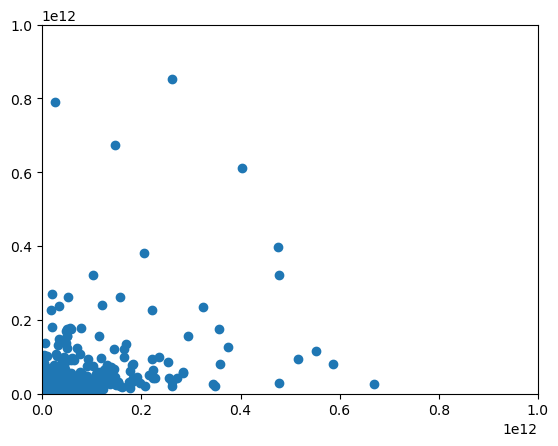

In [58]:
plt.scatter(data_with_revenue['MarketCap'], data_with_revenue['TotalRevenue'])
plt.xlim([-1e9,1e12])
plt.ylim([0,1e12])

### EBITDA EDA

(0.0, 100000000000.0)

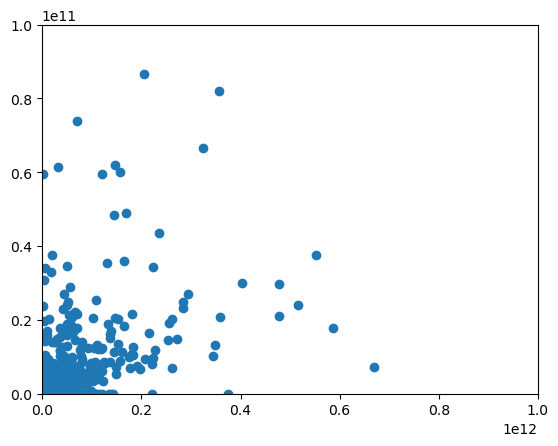

In [57]:
plt.scatter(data_with_revenue['MarketCap'], data_with_revenue['NormEBITDA'])
plt.xlim([-1e9,1e12])
plt.ylim([0,1e11])

It looks like we have some outliers messing up our data that we dropped to make these better looking visualizations. We should remove them from our model as well, because they may hurt our training sample